In [35]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pylab as plt

# import custom classes
from core.database import *
from core.forecast import *


# define db to pull historical data
db = Database(name='bdf')

# select commodity
commodity = 'gold'

# get historical data
data = db.get_commodity(commodity)
data.set_index('date', inplace=True)

# instantiate an object of Forecast class choosing Recurring Neural Network model
forecast = Forecast(data['price'], method='rnn')

# set parameters
forecast.rnn(learning_rate=0.001, hidden=100, num_periods=24)

# fit model
forecast.fit()

# predict 
predicted = forecast.predict()

predicted


0 	MSE:  30304246.0
100 	MSE:  633155.0
200 	MSE:  226042.83
300 	MSE:  24653.498
400 	MSE:  1665.8328
500 	MSE:  1169.2343
600 	MSE:  1121.0867
700 	MSE:  1073.3962
800 	MSE:  1035.8257
900 	MSE:  985.7705


[1332.5664,
 1332.033,
 1330.5017,
 1348.0117,
 1350.1104,
 1354.7754,
 1354.7744,
 1357.8722,
 1330.3116,
 1325.6963,
 1316.0895,
 1318.0935,
 1314.6418,
 1327.2576,
 1333.3076,
 1339.7017,
 1343.5696,
 1347.1813,
 1346.5708,
 1344.6777,
 1344.8545,
 1352.0247,
 1362.4448,
 1362.7788]

In [36]:
data.shape


(25, 7)

Text(0.5,0,'Periods')

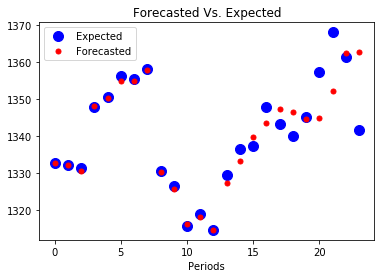

In [37]:
"""
    Plot:
        - scatterplot of observed and predicted values
"""

plt.plot(pd.Series(np.ravel(forecast.Y_test)), 'bo', markersize=10, label='Expected')
plt.plot(pd.Series(np.ravel(predicted)), 'r.', markersize=10, label='Forecasted')
plt.legend(loc='best')

plt.title('Forecasted Vs. Expected')
plt.xlabel('Periods')


In [48]:
data.index[:24]


DatetimeIndex(['2018-02-23', '2018-02-22', '2018-02-21', '2018-02-20',
               '2018-02-19', '2018-02-18', '2018-02-16', '2018-02-15',
               '2018-02-14', '2018-02-13', '2018-02-12', '2018-02-09',
               '2018-02-08', '2018-02-07', '2018-02-06', '2018-02-05',
               '2018-02-02', '2018-02-01', '2018-01-31', '2018-01-30',
               '2018-01-29', '2018-01-26', '2018-01-25', '2018-01-24'],
              dtype='datetime64[ns]', name='date', freq=None)

In [49]:
index = data.index[:forecast.num_periods]
observed = forecast.Y_test
predicted = forecast.predict()


0 	MSE:  42656012.0
100 	MSE:  791921.56
200 	MSE:  250874.64
300 	MSE:  25515.223
400 	MSE:  1714.5924
500 	MSE:  1170.0159
600 	MSE:  1063.0221
700 	MSE:  991.78986
800 	MSE:  928.2214
900 	MSE:  875.8466


In [ ]:

df = pd.DataFrame(np.array([observed, predicted]).T, index=index, columns=['observed', 'predicted'])

,observed,predicted
date,,
2018-02-23,1332.6,1332.579590
2018-02-22,1332.1,1331.847290
2018-02-21,1331.2,1330.296143
2018-02-20,1347.8,1347.916870
2018-02-19,1350.5,1350.278564
2018-02-18,1356.2,1356.463135
2018-02-16,1355.3,1355.012207
2018-02-15,1358.0,1357.295288
2018-02-14,1330.4,1330.235840


In [60]:
observed

[1332.6,
 1332.1,
 1331.2,
 1347.8,
 1350.5,
 1356.2,
 1355.3,
 1358.0,
 1330.4,
 1326.4,
 1315.7,
 1319.0,
 1314.6,
 1329.5,
 1336.5,
 1337.3,
 1347.9,
 1343.1,
 1340.0,
 1345.1,
 1357.2,
 1368.0,
 1361.4,
 1341.7]